## New York City (excluding Staten Island) OSMNx Walking Network + Simulation
Author: Callie Clark
Last Updated: 5/21/2024

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import osmnx as ox
import geopandas as gpd
import numpy as np
import networkx as nx
import json
%matplotlib inline
ox.__version__

from scipy.spatial import cKDTree
from TT_functions import *
import random

In [2]:
year='2023'

In [3]:
G = ox.graph_from_place("New York, New York, USA", network_type="walk")
G = ox.utils_graph.get_largest_component(G, strongly=True)

G = ox.add_edge_speeds(G)
G_ = ox.speed.add_edge_travel_times(G, precision=1)

/tmp/ipykernel_61453/1522447590.py:2: FutureWarning: The `get_largest_component` function is deprecated and will be removed in the v2.0.0 release. Replace it with `truncate.largest_component` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = ox.utils_graph.get_largest_component(G, strongly=True)
/tmp/ipykernel_61453/1522447590.py:5: FutureWarning: The `add_edge_travel_times` function has moved to the `routing` module. Calling `speed.add_edge_travel_times` is deprecated and will be removed in the v2.0.0 release. Call it via `routing.add_edge_travel_times` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G_ = ox.speed.add_edge_travel_times(G, precision=1)
/home/cusp/crc9978/.conda/envs/ox/lib/python3.12/site-packages/osmnx/speed.py:67: FutureWarning: The `precision` parameter is deprecated and will be removed in the v2.0.0 release. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues

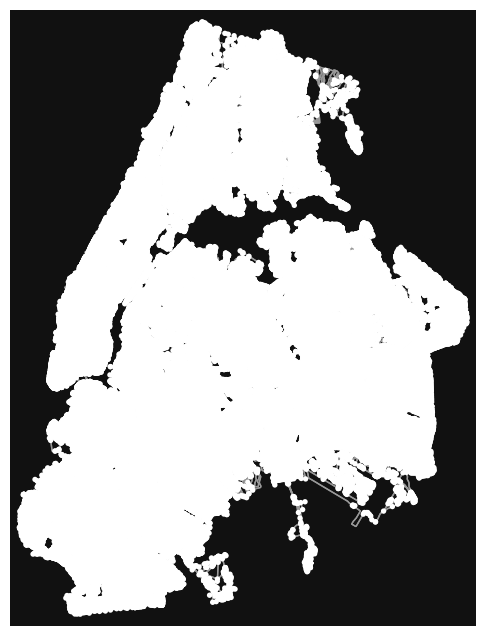

In [4]:
fig, ax = ox.plot_graph(G)

In [5]:

for edge in G.edges:
    edge_obj = G[edge[0]][edge[1]][edge[2]]
    road_type=edge_obj['highway']
    
    distance = edge_obj['length']/1000 # Convert from m to km

    urban_tt = distance/(4.5 /3600)# km/seconds #assuming average wallking speed of 4.5 km/hour (same as google)--> adjust for women (if studies support they are usually FP goers)

    G[edge[0]][edge[1]][edge[2]]['urban_tt'] = round(urban_tt,2)


In [6]:
gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)
gdf_edges

/tmp/ipykernel_61453/232611469.py:1: FutureWarning: The `graph_to_gdfs` function has moved to the `convert` module. Calling `utils_graph.graph_to_gdfs` is deprecated and will be removed in the v2.0.0 release. Call it via `convert.graph_to_gdfs` instead. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  gdf_nodes, gdf_edges = ox.utils_graph.graph_to_gdfs(G, nodes=True, edges=True, node_geometry=True, fill_edge_geometry=True)


osmid      highway  oneway  \
u           v           key                                                  
30807314    2057103273  0                    46613689    bridleway   False   
            6579409036  0                    46613689    bridleway   False   
            1203806263  0                   147089927         path   False   
            1203806304  0                   147089927         path   False   
30978752    2059303879  0                   301283866      footway   False   
...                                               ...          ...     ...   
11920528778 11920528781 0    [1284966139, 1284966140]      footway   False   
11920528781 10798279828 0                   826687037  residential   False   
            42878196    0                   826687037  residential   False   
            11920528778 0    [1284966139, 1284966140]      footway   False   
            10741631296 0    [1160968904, 1284966139]      footway   False   

                            reversed   length  \
u           v           key                     
30807314    2057103273  0      False  159.255   
            6579409036  0       True   58.144   
            1203806263  0      False   28.607   
            1203806304  0       True   17.645   
30978752    2059303879  0      False   10.889   
...                              ...      ...   
11920528778 11920528781 0       True    7.106   
11920528781 10798279828 0      False   41.574   
            42878196    0       True    5.833   
            11920528778 0      False    7.106   
            10741631296 0       True    6.795   

                                                                      geometry  \
u           v           key                                                      
30807314    2057103273  0    LINESTRING (-73.96358 40.79072, -73.96360 40.7...   
            6579409036  0    LINESTRING (-73.96358 40.79072, -73.96354 40.7...   
            1203806263  0    LINESTRING (-73.96358 40.79072, -73.96353 40.7...   
            1203806304  0    LINESTRING (-73.96358 40.79072, -73.96368 40.7...   
30978752    2059303879  0    LINESTRING (-73.97438 40.77475, -73.97444 40.7...   
...                                                                        ...   
11920528778 11920528781 0    LINESTRING (-73.86078 40.74826, -73.86081 40.7...   
11920528781 10798279828 0    LINESTRING (-73.86086 40.74824, -73.86068 40.7...   
            42878196    0    LINESTRING (-73.86086 40.74824, -73.86088 40.7...   
            11920528778 0    LINESTRING (-73.86086 40.74824, -73.86081 40.7...   
            10741631296 0    LINESTRING (-73.86086 40.74824, -73.86091 40.7...   

                             speed_kph  travel_time  urban_tt          name  \
u           v           key                                                   
30807314    2057103273  0         39.8         14.4    127.40           NaN   
            6579409036  0         39.8          5.3     46.52           NaN   
            1203806263  0         40.2          2.6     22.89           NaN   
            1203806304  0         40.2          1.6     14.12           NaN   
30978752    2059303879  0         37.8          1.0      8.71           NaN   
...                                ...          ...       ...           ...   
11920528778 11920528781 0         37.8          0.7      5.68           NaN   
11920528781 10798279828 0         38.8          3.9     33.26  104th Street   
            42878196    0         38.8          0.5      4.67  104th Street   
            11920528778 0         37.8          0.7      5.68           NaN   
            10741631296 0         37.8          0.6      5.44           NaN   

                             ... lanes access  ref service tunnel width  \
u           v           key  ...                                          
30807314    2057103273  0    ...   NaN    NaN  NaN     NaN    NaN   NaN   
            6579409036  0    ...   NaN    NaN  NaN     NaN    NaN   NaN   


In [7]:
gdf_edges.describe()

,length,speed_kph,travel_time,urban_tt
count,1.067050e+06,1.067050e+06,1.067050e+06,1.067050e+06
mean,4.457562e+01,3.775623e+01,4.257144e+00,3.566050e+01
std,6.314278e+01,2.552014e+00,6.055133e+00,5.051423e+01
min,1.700000e-02,1.000000e+01,0.000000e+00,1.000000e-02
25%,7.798000e+00,3.780000e+01,7.000000e-01,6.240000e+00
50%,1.299700e+01,3.780000e+01,1.200000e+00,1.040000e+01
75%,6.479800e+01,3.880000e+01,6.100000e+00,5.184000e+01
max,3.915028e+03,8.850000e+01,4.489000e+02,3.132020e+03


## Spot Check

In [8]:
nyu_coords=ox.distance.nearest_nodes(G, X=-73.986110, Y=40.694340)
home_coords=ox.distance.nearest_nodes(G, X=-73.956030, Y=40.673720)
PL_coords=ox.distance.nearest_nodes(G, X=-73.980711, Y=40.664211)#40.6645972

# G_drive = ox.add_edge_speeds(G_drive)
# G_drive = ox.add_edge_travel_times(G_drive)

route_drive = ox.shortest_path(G, 2295009523, 8916499431, weight="urban_tt")

travel_time_drive = nx.shortest_path_length(G, 2295009523, 8916499431, weight='urban_tt')
#travel_time_drive = ox.distance.shortest_path(G_drive, home_coords, nyu_coords, weight='rush_hour_tt')
travel_time_drive/60

253.9289999999999

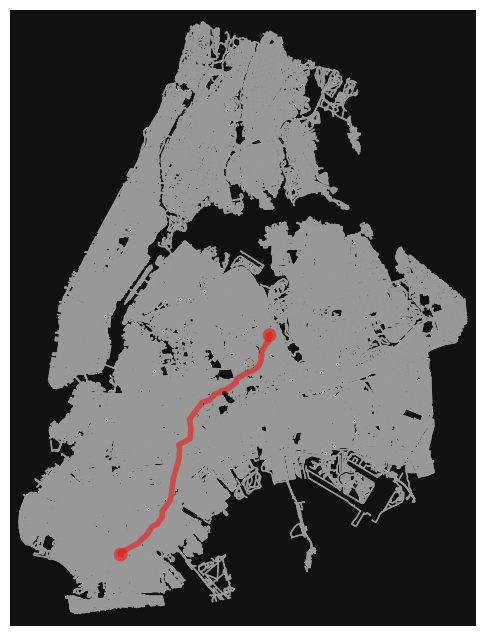

(<Figure size 800x800 with 1 Axes>, <Axes: >)

In [9]:
ox.plot_graph_route(G, route_drive, node_size=0)

# Calculate TT

In [10]:
census_tract=pd.read_csv('geo_files/census_tract_centroid.csv',index_col=0)
census_tract=census_tract[~(census_tract.BoroName=='Staten Island')]
census_tract['node']=ox.distance.nearest_nodes(G, list(census_tract['lon']), list(census_tract['lat']), return_dist=False)
census_tract.head(n=3)

,GEOID,BoroName,NTA2020,lon,lat,centroid,node
0,36061000100,Manhattan,MN0191,-74.042340,40.695673,POINT (-74.04233991488555 40.69567298240604),9964953485
1,36061000201,Manhattan,MN0301,-73.985848,40.711869,POINT (-73.98584800028144 40.71186871871548),8233443672
2,36061000600,Manhattan,MN0301,-73.989477,40.711951,POINT (-73.9894767752886 40.711950582311424),8310246611


In [11]:
census_tract_csv=census_tract[['GEOID','node']]
census_tract_csv.rename(columns={'node':'walk_node'},inplace=True)
census_tract_csv.set_index(keys='GEOID',inplace=True)
#census_tract_csv.to_csv('node_data/CT_nodes_walk_4b.csv')

/tmp/ipykernel_61453/630200108.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  census_tract_csv.rename(columns={'node':'walk_node'},inplace=True)


In [12]:

fp_df=gpd.read_file("FP_data/food_pantry_schedule_final.geojson",index_col=0)
fp_df=fp_df[~(fp_df.BoroName=='Staten Island')]
fp_df['node']=ox.distance.nearest_nodes(G, list(fp_df['lng']), list(fp_df['lat']), return_dist=False)
fp_df_csv=fp_df[['id','node']]
fp_df_csv.rename(columns={'node':'walk_node'},inplace=True)
fp_df_csv.set_index(keys='id',inplace=True)
fp_node_map=dict(zip(fp_df_csv['walk_node'],fp_df_csv.index))
#fp_df_csv.to_csv('node_data/fp_nodes_walk_4b.csv')

/tmp/ipykernel_61453/1997889639.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fp_df_csv.rename(columns={'node':'walk_node'},inplace=True)


In [14]:
CT_gpd = gpd.GeoDataFrame(
    census_tract, geometry=gpd.points_from_xy(census_tract.lon, census_tract.lat))

In [15]:

node_county_dict=dict(zip(census_tract['node'],census_tract['BoroName']))
# with open('node_data/walk_node_county_map_4b.json', 'w') as f:
#     # write the dictionary to the file in JSON format
#     json.dump(node_county_dict, f)

In [16]:
df_tt=make_tt_df(G,gdf_nodes,fp_df,CT_gpd,node_county_dict,mode='Walk',k_nearest=25)
df_tt

Process ForkPoolWorker-33:
Process ForkPoolWorker-59:
Process ForkPoolWorker-53:
Process ForkPoolWorker-31:
Process ForkPoolWorker-34:
Process ForkPoolWorker-64:
Process ForkPoolWorker-51:
Process ForkPoolWorker-63:
Process ForkPoolWorker-57:

KeyboardInterrupt



In [ ]:
df_tt_=census_tract_csv.merge(df_tt,left_on='walk_node',right_index=True).drop(columns=['walk_node'])
#maps FP nodes to FP IDs
for col in [i for i in df_tt_.columns if 'nearest' in i]:
    df_tt_[col]=df_tt_[col].map(fp_node_map)
df_tt_.to_csv('travel_time_df/df_tt_walk_4b_k10.csv')


In [ ]:
def make_col_name_inputs(time_period):
    colnames=['_node1','_tt1',
     '_node2',
     '_tt2',
     '_node3',
     '_tt3']
    tt_colnames=['_tt1','_tt2','_tt3']

    node_colnames=['_node1','_node2','_node3']
    
    _colnames=[time_period+j for j in colnames]
    tt_colnames=[time_period+j for j in tt_colnames]
    node_colnames=[time_period+j for j in node_colnames]
    
    return _colnames,tt_colnames,node_colnames

# Sanity Check

In [ ]:
open_fp_dict=get_time_table(fp_df)
time_period='Th_morning'
fp_node=list(open_fp_dict[time_period])
fp_df_open=fp_df.loc[fp_df['node'].isin(fp_node)]

county = gpd.read_file('geo_files/cb_2020_36_tract_500k.shp')
print("Shape of the dataframe: {}".format(county.shape))
print("Projection of dataframe: {}".format(county.crs))

nyc_CT=county[county.NAMELSADCO.isin(['Bronx County','Kings County', 'Queens County','Richmond County','New York County'])]
nyc_CT.set_crs(4269,allow_override=True)
nyc_CT['centroid']=nyc_CT.geometry.to_crs(4629).centroid
nyc_CT.head(n=2)

fig,(ax1)=plt.subplots(ncols=(1),nrows=(1),figsize=(12,12))
nyc_CT.plot(ax=ax1,alpha=0.3,color='grey',zorder=1,edgecolor='black');

fp_df_open.plot(ax=ax1,label='FP')
fp_df[fp_df['node']==42870433].plot(ax=ax1,color='green',label='Closest FP')
CT_gpd[CT_gpd['node']==42733367].plot(ax=ax1,color='red',label='CT')
ax1.legend();

### Combine All 5 boroughs

In [22]:
df_tt_4=pd.read_csv(year+'/tt_df/df_tt_walk_4b.csv',index_col=0)

df_tt_4

,Mo_period_1_nearest_node,Mo_period_1_tt,Mo_period_1_stops,Mo_period_2_nearest_node,Mo_period_2_tt,Mo_period_2_stops,Mo_period_3_nearest_node,Mo_period_3_tt,Mo_period_3_stops,Mo_period_4_nearest_node,...,Su_period_1_stops,Su_period_2_nearest_node,Su_period_2_tt,Su_period_2_stops,Su_period_3_nearest_node,Su_period_3_tt,Su_period_3_stops,Su_period_4_nearest_node,Su_period_4_tt,Su_period_4_stops
9964953485,4876543170,8.605000,0.0,4876543170,8.605000,0.0,4876543170,8.605000,0.0,4876543170,...,13.0,4890333648,35.798167,13.0,4890333648,35.798167,13.0,2477457643,38.634833,7.0
8233443672,8372982792,10.627000,1.0,5804835254,8.555167,1.0,8372982792,10.627000,1.0,8236347423,...,9.0,4890333648,33.173500,9.0,4890333648,33.173500,9.0,2477457643,34.066333,8.0
8310246611,8372982792,6.136833,0.0,8372982792,6.136833,0.0,8372982792,6.136833,0.0,8236347423,...,8.0,4890333648,28.792333,8.0,4890333648,28.792333,8.0,2477457643,30.550667,4.0
7465349814,7465346952,5.398667,0.0,5804835254,2.398000,0.0,8372982792,6.855833,2.0,8236347423,...,21.0,4890333648,27.334167,21.0,4890333648,27.334167,21.0,2477457643,27.877667,4.0
7476387556,7465346952,3.934833,1.0,5804835254,3.448500,0.0,8236347423,9.278500,1.0,8236347423,...,8.0,2477457643,24.298167,8.0,2477457643,24.298167,8.0,2477457643,24.298167,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4630877190,2755480442,81.003833,11.0,42491880,58.725000,17.0,42491880,58.725000,17.0,7970460726,...,62.0,5488669151,74.885333,20.0,9829286739,93.174500,13.0,2477457643,233.610333,61.0
4301308511,8309479379,4.185167,0.0,8309479379,4.185167,0.0,8309479379,4.185167,0.0,8236347423,...,9.0,8310246321,38.965500,0.0,2477457643,42.909333,9.0,2477457643,42.909333,9.0
9794890530,9772859278,26.539000,2.0,9772859278,26.539000,2.0,8236347423,104.344833,9.0,9825389081,...,10.0,8310246321,121.107833,11.0,8809377032,61.020500,6.0,2477457643,100.750833,13.0
6579385568,9836261108,27.061000,0.0,10709356770,16.077167,1.0,10709356770,16.077167,1.0,9825389081,...,15.0,10709356770,16.077167,1.0,8809377032,38.377333,9.0,2477457643,110.396833,25.0


In [23]:
df_tt_1=pd.read_csv(year+'/tt_df/df_tt_walk_richmond.csv',index_col=0)
df_tt_1

,Mo_period_1_nearest_node,Mo_period_1_tt,Mo_period_1_stops,Mo_period_2_nearest_node,Mo_period_2_tt,Mo_period_2_stops,Mo_period_3_nearest_node,Mo_period_3_tt,Mo_period_3_stops,Mo_period_4_nearest_node,...,Su_period_1_stops,Su_period_2_nearest_node,Su_period_2_tt,Su_period_2_stops,Su_period_3_nearest_node,Su_period_3_tt,Su_period_3_stops,Su_period_4_nearest_node,Su_period_4_tt,Su_period_4_stops
6821707281,4517181891,11.466333,3.0,4517181891,11.466333,3.0,7762066911,74.649667,14.0,7762066911,...,14.0,43018378,20.481500,4.0,43018378,20.481500,4.0,10295523850,41.154333,4.0
5490546068,4517181891,35.260000,7.0,4517181891,35.260000,7.0,5490280653,37.962333,6.0,7762066911,...,22.0,43018378,28.650833,3.0,10295523850,27.811667,2.0,10295523850,27.811667,2.0
6821653313,4517181891,19.450333,2.0,7838275825,9.876667,0.0,7762066911,66.683167,9.0,7762066911,...,9.0,43018378,28.488833,4.0,43018378,28.488833,4.0,10295523850,49.138333,3.0
5490376862,5490280653,33.610667,3.0,5490280653,33.610667,3.0,5490280653,33.610667,3.0,7762066911,...,18.0,43018378,32.165000,4.0,10295523850,24.214833,2.0,10295523850,24.214833,2.0
10241350797,4517181891,20.716667,2.0,7838275825,14.169667,0.0,7762066911,70.976167,9.0,7762066911,...,9.0,43018378,29.843833,3.0,43018378,29.843833,3.0,10295523850,49.737333,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6051118336,6900265219,33.356333,0.0,7761494606,28.325333,2.0,7762066911,36.844333,3.0,7762066911,...,3.0,5490169252,34.129000,3.0,7762066889,36.694167,3.0,7762066911,36.844333,3.0
5490499092,42993472,23.160333,3.0,42993472,23.160333,3.0,5490280653,23.164500,3.0,7762066911,...,26.0,43018378,49.140833,7.0,10295523850,48.301667,6.0,10295523850,48.301667,6.0
8268155444,5490280653,15.769167,2.0,5490280653,15.769167,2.0,5490280653,15.769167,2.0,7762066911,...,22.0,43018378,51.434000,6.0,10295523850,39.867667,6.0,10295523850,39.867667,6.0
10157530378,42993472,60.528167,5.0,42993472,60.528167,5.0,5490280653,63.151833,5.0,7762066911,...,21.0,43018378,114.999667,17.0,10295523850,94.177333,18.0,10295523850,94.177333,18.0


In [24]:
df_tt_5=pd.concat([df_tt_4,df_tt_1])

In [25]:
df_tt_5.to_csv(year+'/tt_df/df_tt_walk.csv')